# Text Mining

In [2]:
# Installing wordcloud
!pip install wordcloud
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])
import string
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUP009\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUP009\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SUP009\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SUP009\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SUP009\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Using the function to apply a all of the data processing steps

# Tokenizing the text using RegexpTokenizer from NLTK
# Removing stopwords
# Applying stemming to reduce words to their root form
# Returning the preprocessed text as a series of the stemmed tokens

def preprocess_text(text):
  tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenizing
  cleaned_tokens = [word.lower() for word in tokenized_document if word.lower()not in stop_words] #Removing stopwords
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Applying Stemming
  return stemmed_text

In [4]:
# Using NLTK to provide a corpus a Stop Words
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# Importing the dataset and renaming the dataset coloumn header

dataset = pd.read_csv("Emotion_classify_Data.csv")

# previewing the first five rows of the dataset 
dataset.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [6]:
# last five rows of the datset
dataset.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [7]:
# Displaying the dataset shape
dataset.shape

(5937, 2)

In [8]:
# Checking for any null values in dataset
print(dataset.isnull().sum())

Comment    0
Emotion    0
dtype: int64


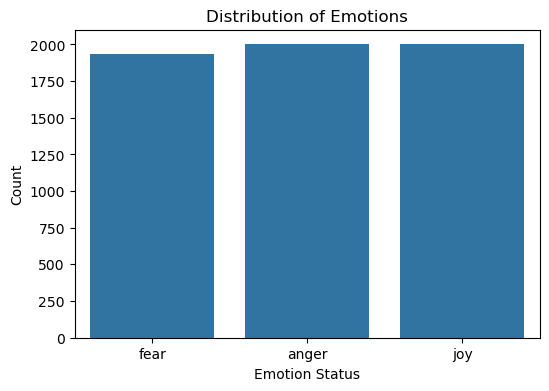

In [9]:
# Plot the distribution of the emotion column
plt.figure(figsize=(6, 4))
plt.title("Distribution of Emotions")
sns.countplot(data=dataset, x='Emotion')
plt.xlabel("Emotion Status")
plt.ylabel("Count")
plt.show()

In [10]:
#carrying out the pre-processing steps for a Bag-Of-Words model
dataset['Comment'] = dataset['Comment'].apply(preprocess_text)
dataset.head()

,Comment,Emotion
0,"[serious, hate, one, subject, death, feel, rel...",fear
1,"[im, full, life, feel, appal]",anger
2,"[sit, write, start, dig, feel, think, afraid, ...",fear
3,"[ive, realli, angri, r, feel, like, idiot, tru...",joy
4,"[feel, suspici, one, outsid, like, raptur, hap...",fear


In [11]:
# Generatingthe termfrequency matrix for the dataset using countvectorizer in scikit learn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(dataset['Comment'].map(''.join))
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,5888,5889,5890,5891,5892,5893,5894,5895,5896,5897
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Checking the dataset for class imbalance 
print("\n All Data labels")
print(dataset.groupby("Emotion").count())


 All Data labels
         Comment
Emotion         
anger       2000
fear        1937
joy         2000


In [46]:
# Training the model
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
y = dataset['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2,random_state=99)

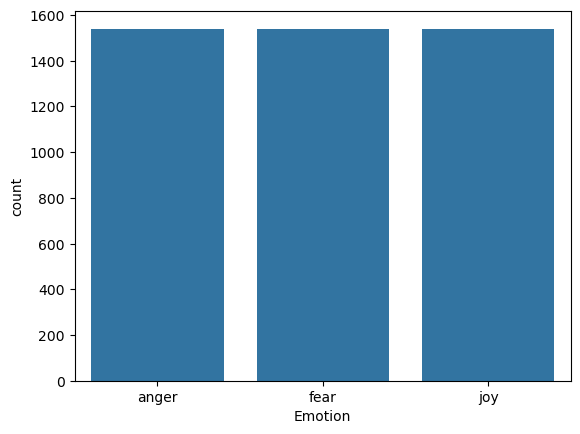

In [47]:
# Addressing the class imbalance 
# Importing the libraries for the class imbalance
# Using RandomUnderSampler method

from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_undersampled)
plt.show()

In [48]:
# Instantiating the model using MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

In [49]:
y_pred = model.predict(X_test)

#Computing the accuracy and Making the Confusion Matrix
from sklearn import metrics
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: %.2f\n\n' % (acc))
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('------------------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)


Accuracy: 0.35


Confusion Matrix:
[[405   2   0]
 [395   2   0]
 [381   0   3]] 


------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

       anger       0.34      1.00      0.51       407
        fear       0.50      0.01      0.01       397
         joy       1.00      0.01      0.02       384

    accuracy                           0.35      1188
   macro avg       0.61      0.34      0.18      1188
weighted avg       0.61      0.35      0.18      1188



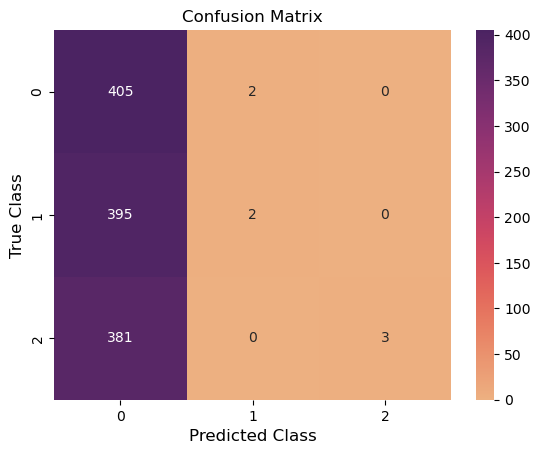

In [17]:
ax = sns.heatmap(cm, cmap='flare', annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

# Sentiment Analysis

In [18]:
# Reading in the emotion dataset
emotions = pd.read_csv("Emotion_classify_Data.csv")

In [19]:
emotions.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [20]:
emotions.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [21]:
emotions.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [22]:
# Extracting the values from the dictionary to create a new column within the dataset
# Using VADER model from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
emotions['compound'] = [sentiment.polarity_scores(emotion)['compound'] for emotion in emotions['Comment']]
emotions['neg'] = [sentiment.polarity_scores(emotion)['neg'] for emotion in emotions['Comment']]
emotions['neu'] = [sentiment.polarity_scores(emotion)['neu'] for emotion in emotions['Comment']]
emotions['pos'] = [sentiment.polarity_scores(emotion)['pos'] for emotion in emotions['Comment']]

In [23]:
# checking the new columns
emotions.head()

,Comment,Emotion,compound,neg,neu,pos
0,i seriously hate one subject to death but now ...,fear,-0.8519,0.585,0.415,0.000
1,im so full of life i feel appalled,anger,-0.4588,0.333,0.667,0.000
2,i sit here to write i start to dig out my feel...,fear,0.3818,0.000,0.902,0.098
3,ive been really angry with r and i feel like a...,joy,-0.4005,0.275,0.518,0.207
4,i feel suspicious if there is no one outside l...,fear,-0.1531,0.237,0.556,0.207


In [24]:
emotions[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,5937.000000,5937.000000,5937.000000,5937.000000
mean,0.025563,0.170644,0.647697,0.181652
std,0.546345,0.165210,0.163676,0.162351
min,-0.984000,0.000000,0.000000,0.000000
25%,-0.458800,0.000000,0.548000,0.052000
50%,0.000000,0.142000,0.663000,0.156000
75%,0.529000,0.264000,0.765000,0.272000
max,0.984700,0.948000,1.000000,1.000000


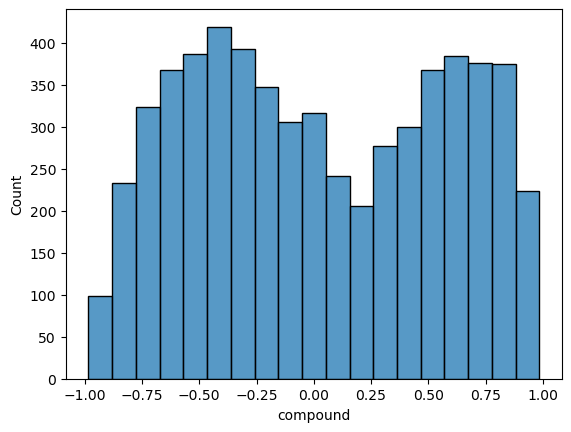

In [25]:
sns.histplot(emotions['compound'])
plt.show()

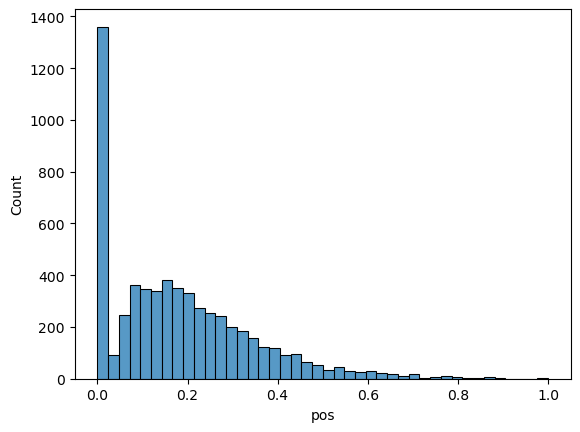

In [26]:
sns.histplot(emotions['pos'])
plt.show()

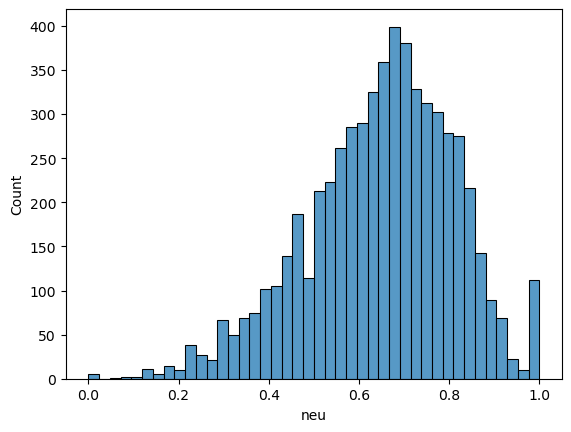

In [27]:
sns.histplot(emotions['neu'])
plt.show()

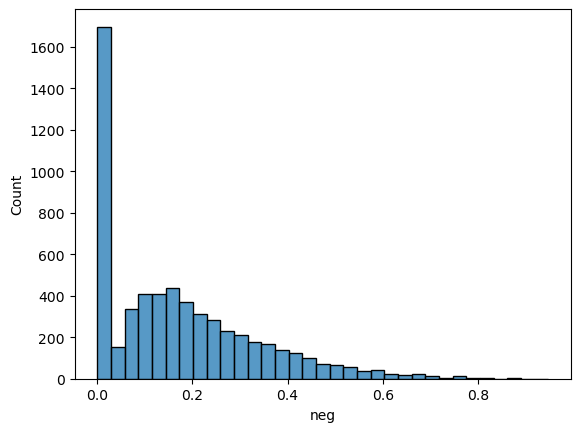

In [28]:
sns.histplot(emotions['neg'])
plt.show()

In [29]:
# Viewing the negative emotions per comment
(emotions['compound']<=0).groupby(emotions['Emotion']).sum()

Emotion
anger    1515
fear     1344
joy       220
Name: compound, dtype: int64

In [30]:
# calculating as percentage of total comments
percent_negative = pd.DataFrame((emotions['compound']<=0).groupby(emotions['Comment']).sum()
                                    /emotions['Comment'].groupby(emotions['Comment']).count()*100,
                                    columns=['% negative emotions']).sort_values(by= '% negative emotions')
percent_negative

,% negative emotions
Comment,
a boyfriend with whom i split up with came over to a friends house where i was visiting with a male friend in a confrontation in another room he tried to find out if i was aroused by my friend by feeling my parts,0.0
i guess i feel that if i don t fulfill some of my artistic pursuits now i certainly won t have the time when the economy picks up,0.0
i guess i just need to see how it goes so while im feeling very nervous im also very excited,0.0
i guess i m a sucker for the grand and endless battle between apparent good and apparent evil and i m no different than anyone else who feels they have the divine gift of discernment in situations like this,0.0
i guess i would feel more like joseph with walt trusting me to care for mother and over the finances which he did six months before he died there are times i want to defend my self but god makes me be quiet,0.0
...,...
i dunno the word im even looking for i guess because im not exactly how i feel im selfish i know,100.0
i have this crush on my bus mate and i feel strange about it because i used to despise him,100.0
i dunno i just feel that i started this blog a little shaky as i wasnt really sure about what sort of audience i was addressing or anything,100.0


In [31]:
# Processing the text data for Word cloud visualization
emotions['processed_emotion'] = emotions['Comment'].apply(preprocess_text)
# Create a subset for positive emotions
emotions_positive_subset = emotions[emotions['compound'] > 0]

# Create a subset for negative emotions
emotions_negative_subset = emotions[emotions['compound'] <= 0]


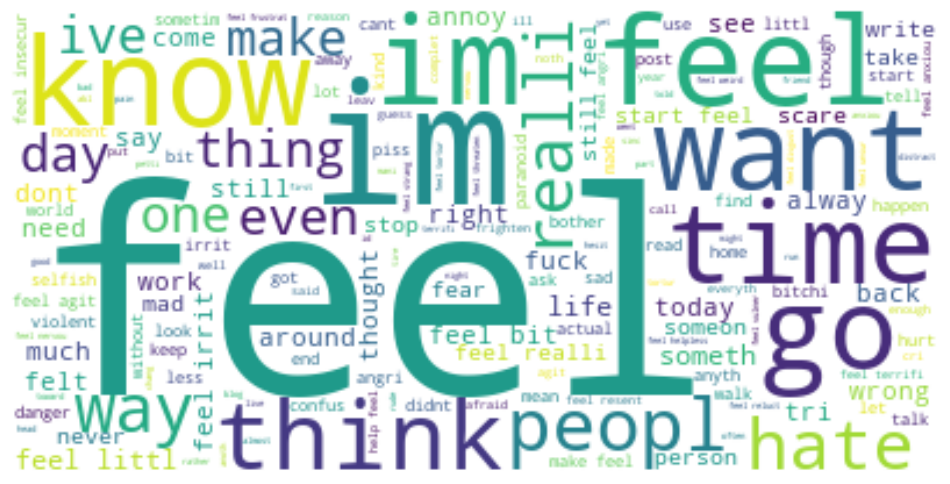

In [32]:
# Wordclouds fromn the negative emotion
neg_tokens = [word for emotion in emotions_negative_subset['processed_emotion'] for word in emotion]

wordcloud =WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

# plotting the WordCloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

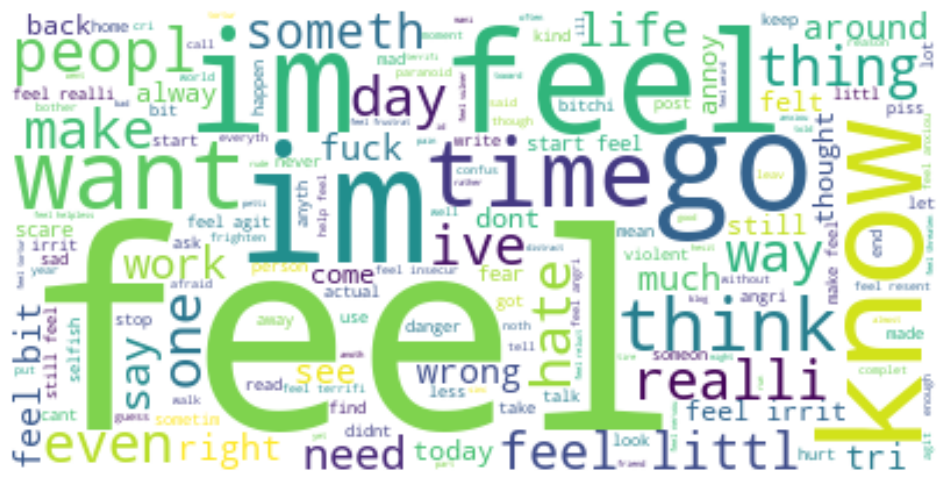

In [33]:
# Wordclouds fromn the positive emotion
pos_tokens = [word for emotion in emotions_positive_subset['processed_emotion'] for word in emotion]

wordcloud =WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))

# plotting the WordCloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
# for positive emotion Using NLTK FreqDist and then tabulation
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

  feel   like     im    get   time   make   want   love  littl realli 
  3055    668    470    201    200    198    181    168    159    158 


In [35]:
# for negative emotion Using NLTK FreqDist and then tabulation
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

  feel     im   like    get   know     go   want  littl realli   time 
  3178    473    345    201    196    191    177    167    165    160 


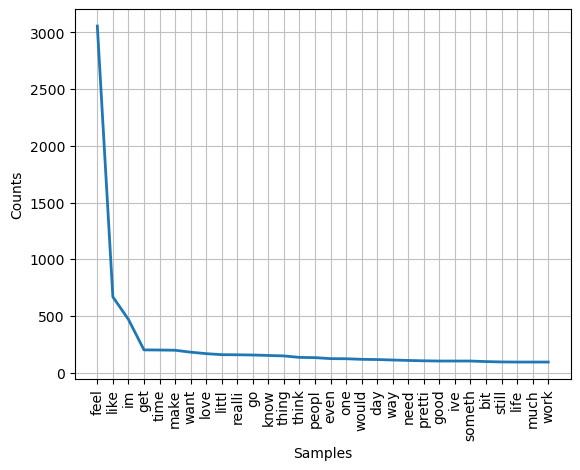

In [36]:
# using the plot method to create a frequency distribution plot for the most frequent words in both the positive emotions
pos_freqdist.plot(30)
plt.show()

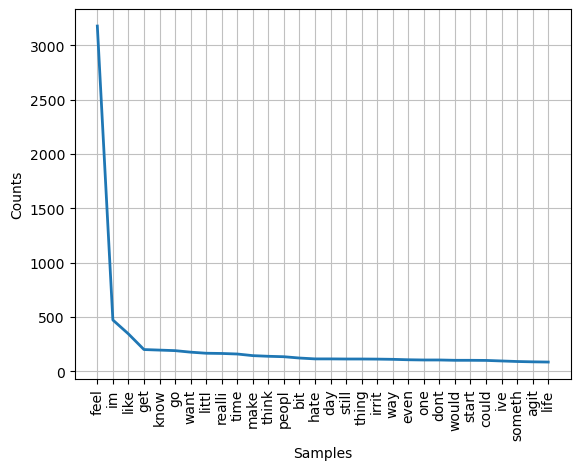

In [37]:
# using the plot method to create a frequency distribution plot for the most frequent words in both the negative emotions
neg_freqdist.plot(30)
plt.show()